In [ ]:
# We clone all the code and tools from GitHub to this Notebook
!git clone -b 2-vdb https://github.com/kasparvonbeelen/heritageweaver.git
!sh /content/heritageweaver/create_env.sh

In [ ]:
# # we need to restart the session
# # to load the updated Pillow version
import os
os.kill(os.getpid(), 9)

In [2]:
import chromadb
import json
import pandas as pd
from chromadb.utils.data_loaders import ImageLoader
from heritageweaver.weavingtools.annotation_tools import *
from heritageweaver.weavingtools.linkage_tools import *
from heritageweaver.weavingtools.embedding_tools import *

/Users/kasparbeelen/anaconda3/envs/heritageweaver/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [3]:
collection_db = load_db("hw","heritage_weaver",'google/siglip-base-patch16-224')
collection_df = pd.read_csv('/content/heritageweaver/data/heritage_weaver_data.csv')

(6020, 22026)

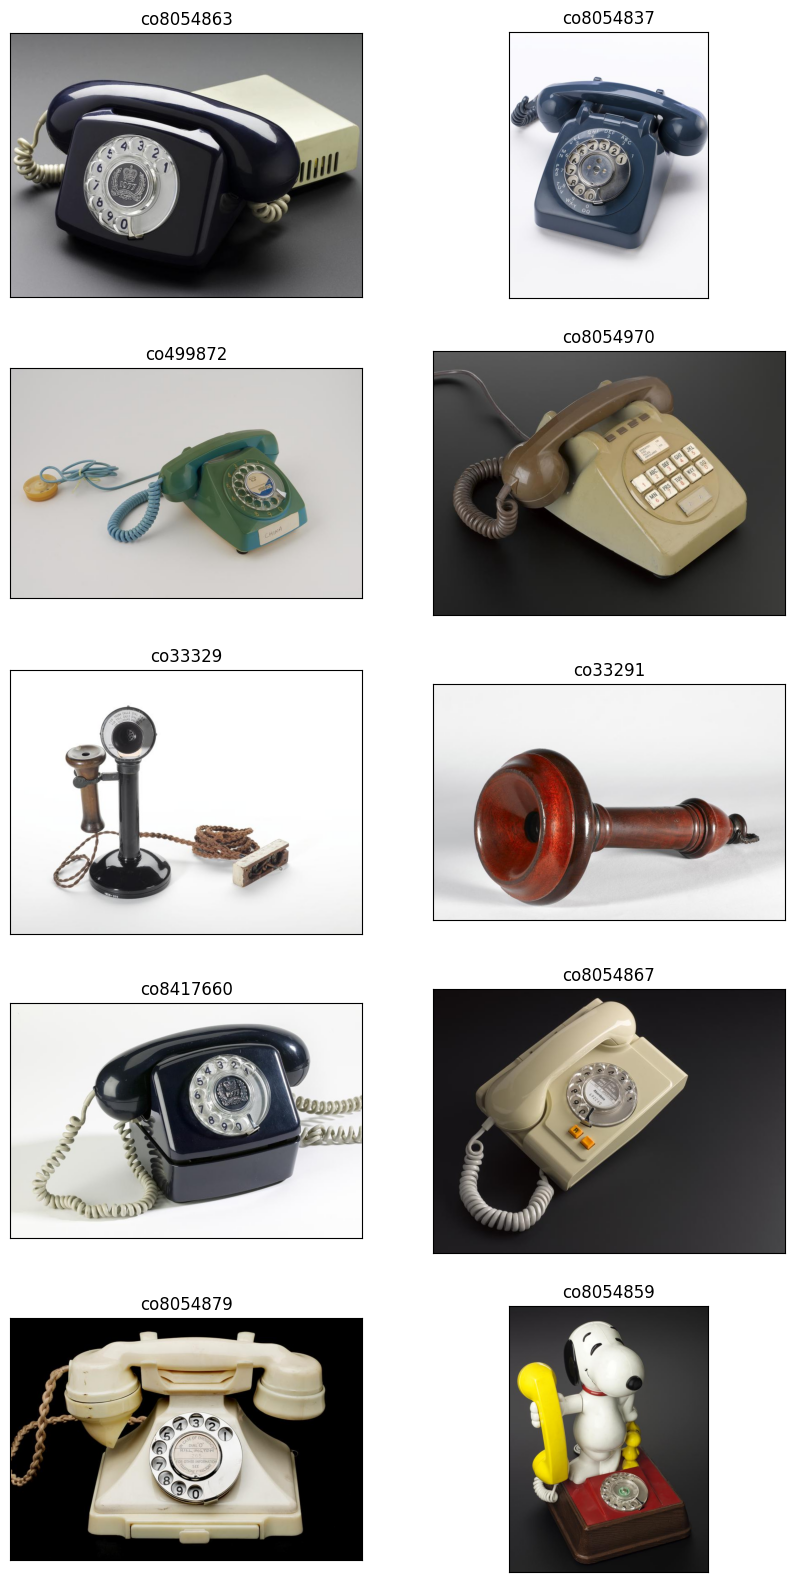

In [13]:
filters = {
    "$and": [
        {
            "input_modality": {
                "$eq": "text"
            }
        },
        {
            "collection": {
                "$eq" : "smg"
            }
        }
    ]
}

#results = collection_db.query(query_uris=[query_img],where=filters, n_results=10)
results = collection_db.query(query_texts=['blue telephone with roundel'],where=filters, n_results=25)
query_df = plot_query_results(results, collection_df, source='img_url')